In [ ]:
# allow imports from src
import sys

sys.path.append("..")

# autoreload code
%load_ext autoreload
%autoreload 2

# Crawling Locations for Scraping Roofs

In [21]:
from src.crawling import get_crawl_locations

locations = get_crawl_locations(
    locations=[(28.76584641574725, -81.26798109985344)],
    max_requests=100,
    max_crawl_depth=6,
)

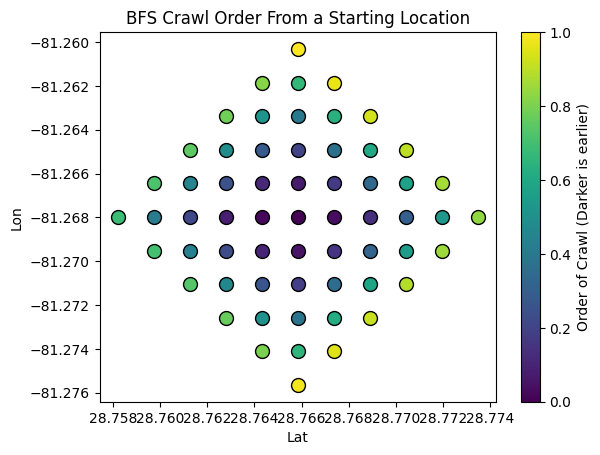

In [22]:
from matplotlib import pyplot as plt
import numpy as np

colors = np.linspace(0, 1, len(locations))
colormap = plt.get_cmap("viridis")

# create graph showing crawl order
for i, (x, y) in enumerate(locations):
    plt.scatter(x, y, color=colormap(colors[i]), edgecolor="k", s=100)

plt.xlabel("Lat")
plt.ylabel("Lon")
plt.title(label="BFS Crawl Order From a Starting Location")
plt.colorbar(label="Order of Crawl (Darker is earlier)")
plt.show()

In [23]:
from src.scraping import GoogleMapsScraper, FileSystem
from src.settings import google_maps_api_key
import requests

SAVE_DIR = "../data/static_maps"

# create scraper
scraper = GoogleMapsScraper(
    api_key=google_maps_api_key,
    save_dir=SAVE_DIR,
    requests=requests,
    filesystem=FileSystem(),
)

In [26]:
import glob
from src.crawling import scrape_image_from_locations, get_existing_locations

# get existing files
existing_files = glob.iglob(f"{SAVE_DIR}/*.png")

# don't scrape images that exist
existing_locations = get_existing_locations(scraper, filenames=existing_files)
locations_to_scrape = list(set(locations) - set(existing_locations))

# scrape images from locations
scrape_image_from_locations(locations_to_scrape, scraper)